<a href="https://colab.research.google.com/github/AndreiAf02/Trust_Model/blob/main/Trust_Model_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

In [2]:
## 3rd Order Function:
def Trust_ODE(T,t,e,alpha):
  dTdt = -alpha*T + alpha*e
  return dTdt

In [3]:
path_to_data = 'https://raw.githubusercontent.com/AndreiAf02/Trust_Model/refs/heads/main/Project_Data/'

In [4]:
Affective_data = pd.read_csv(path_to_data+'Affective_Expectations_Numeric.csv', sep=",", header=0)
Cognitive_data = pd.read_csv(path_to_data+'Cognitive_Expectations_Numeric.csv', sep=",", header=0)

In [5]:
Cognitive_data['Role'].unique()

array(['Project Leader', 'External Co-Investigator',
       'Internal Co-Investigator', 'Administrative Manager',
       'Service Provider', 'Beneficiary', 'Financier'], dtype=object)

In [6]:
## Dropping the C8 question from the Closing phase, since it is redundant with Questions 9 and 10:
Cognitive_data.loc[Cognitive_data['Stage']=='Closing', 'C8'] = np.nan
Cognitive_data

,Index,Stage,Mid-point?,Project,Year,Month,Role (ESP),Role,Project Title,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,1,Planning,No,1,2009 - 2014,3,Líder de proyecto,Project Leader,Desarrollo e Innovación Tecnológica en Ganader...,5.0,5.0,5.0,5.0,4.0,5.0,5.0,NaN,NaN,NaN
1,2,Planning,No,1,2009 - 2014,3,Co-investigador Externo,External Co-Investigator,Desarrollo e innovación Tecnológica en Ganader...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN
2,3,Planning,No,1,2009 - 2014,3,Co-investigador interno,Internal Co-Investigator,Desarrollo e Innovación en Ganadería Ecológica,4.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN
3,4,Planning,No,1,2009 - 2014,3,Gestor administrativo,Administrative Manager,Desarrollo e innovación tecnológica en ganader...,5.0,5.0,5.0,5.0,4.0,4.0,5.0,NaN,NaN,NaN
4,5,Planning,No,1,2009 - 2014,3,Proveedor,Service Provider,Desarrollo e Innovación Tecnológica en Ganader...,3.0,4.0,4.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,150,Closing,No,6,2015 - 2017,18,Co-investigador Externo,External Co-Investigator,CADENA PRODUCTIVA DE LAS ABEJAS,2.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0
150,151,Closing,No,6,2015 - 2017,18,Gestor administrativo,Administrative Manager,CADENA PRODUCTIVA DE LAS ABEJAS,3.0,NaN,2.0,3.0,3.0,2.0,3.0,NaN,2.0,2.0
151,152,Closing,No,6,2015 - 2017,18,Proveedor,Service Provider,CADENA PRODUCTIVA DE LAS ABEJAS,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,3.0,3.0
152,153,Closing,No,6,2015 - 2017,18,Beneficiario,Beneficiary,CADENA PRODUCTIVA DE LAS ABEJAS,2.0,3.0,2.0,2.0,3.0,2.0,2.0,NaN,2.0,2.0


In [7]:
Affective_data

,Index,Stage,Mid-point?,Project,Year,Month,Role (ESP),Role,Project Title,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,1,Planning,No,1,2009 - 2014,3,Líder de proyecto,Project Leader,Desarrollo e Innovación Tecnológica en Ganader...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0
1,2,Planning,No,1,2009 - 2014,3,Co-investigador Externo,External Co-Investigator,Desarrollo e innovación Tecnológica en Ganader...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,3,Planning,No,1,2009 - 2014,3,Co-investigador interno,Internal Co-Investigator,Desarrollo e Innovación en Ganadería Ecológica,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0
3,4,Planning,No,1,2009 - 2014,3,Gestor administrativo,Administrative Manager,Desarrollo e innovación tecnológica en ganader...,5.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,5,Planning,No,1,2009 - 2014,3,Proveedor,Service Provider,Desarrollo e Innovación Tecnológica en Ganader...,4.0,NaN,NaN,3.0,NaN,NaN,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,150,Closing,No,6,2015 - 2017,18,Co-investigador Externo,External Co-Investigator,CADENA PRODUCTIVA DE LAS ABEJAS,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,2.0
150,151,Closing,No,6,2015 - 2017,18,Gestor administrativo,Administrative Manager,CADENA PRODUCTIVA DE LAS ABEJAS,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0
151,152,Closing,No,6,2015 - 2017,18,Proveedor,Service Provider,CADENA PRODUCTIVA DE LAS ABEJAS,3.0,3.0,NaN,3.0,NaN,NaN,NaN,2.0,3.0,3.0
152,153,Closing,No,6,2015 - 2017,18,Beneficiario,Beneficiary,CADENA PRODUCTIVA DE LAS ABEJAS,2.0,3.0,3.0,3.0,3.0,NaN,3.0,3.0,3.0,3.0


In [8]:
Cognitive_data

,Index,Stage,Mid-point?,Project,Year,Month,Role (ESP),Role,Project Title,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,1,Planning,No,1,2009 - 2014,3,Líder de proyecto,Project Leader,Desarrollo e Innovación Tecnológica en Ganader...,5.0,5.0,5.0,5.0,4.0,5.0,5.0,NaN,NaN,NaN
1,2,Planning,No,1,2009 - 2014,3,Co-investigador Externo,External Co-Investigator,Desarrollo e innovación Tecnológica en Ganader...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN
2,3,Planning,No,1,2009 - 2014,3,Co-investigador interno,Internal Co-Investigator,Desarrollo e Innovación en Ganadería Ecológica,4.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN
3,4,Planning,No,1,2009 - 2014,3,Gestor administrativo,Administrative Manager,Desarrollo e innovación tecnológica en ganader...,5.0,5.0,5.0,5.0,4.0,4.0,5.0,NaN,NaN,NaN
4,5,Planning,No,1,2009 - 2014,3,Proveedor,Service Provider,Desarrollo e Innovación Tecnológica en Ganader...,3.0,4.0,4.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,150,Closing,No,6,2015 - 2017,18,Co-investigador Externo,External Co-Investigator,CADENA PRODUCTIVA DE LAS ABEJAS,2.0,3.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0
150,151,Closing,No,6,2015 - 2017,18,Gestor administrativo,Administrative Manager,CADENA PRODUCTIVA DE LAS ABEJAS,3.0,NaN,2.0,3.0,3.0,2.0,3.0,NaN,2.0,2.0
151,152,Closing,No,6,2015 - 2017,18,Proveedor,Service Provider,CADENA PRODUCTIVA DE LAS ABEJAS,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,3.0,3.0
152,153,Closing,No,6,2015 - 2017,18,Beneficiario,Beneficiary,CADENA PRODUCTIVA DE LAS ABEJAS,2.0,3.0,2.0,2.0,3.0,2.0,2.0,NaN,2.0,2.0


## Cognitive Expectations:

In [9]:
project_list_cog = Cognitive_data['Project'].unique()
print('Project list:', project_list_cog)
role_list_cog = Cognitive_data['Role'].unique()
print('Role list:', role_list_cog)
stage_list_cog = Cognitive_data['Stage'].unique()
print('Stage list:', stage_list_cog)

Project list: [1 2 3 4 5 6]
Role list: ['Project Leader' 'External Co-Investigator' 'Internal Co-Investigator'
 'Administrative Manager' 'Service Provider' 'Beneficiary' 'Financier']
Stage list: ['Planning' 'Execution' 'Closing']


Project Number: 1, Role: Project Leader, Final Stage Values: [0.96786, 0.97179, 0.97218]
Project Number: 1, Role: External Co-Investigator, Final Stage Values: [1.0, 0.975, 0.9725]
Project Number: 1, Role: Internal Co-Investigator, Final Stage Values: [0.96786, 0.92179, 0.96718]
Project Number: 1, Role: Administrative Manager, Final Stage Values: [0.93571, 0.84357, 0.84373]
Project Number: 1, Role: Service Provider, Final Stage Values: [0.73, 0.7105, 0.68176]
Project Number: 1, Role: Beneficiary, Final Stage Values: [0.87143, 0.86214, 0.88621]
Project Number: 1, Role: Financier, Final Stage Values: [0.83929, 0.95893, 0.82714]
--------------------------------------------------
Project Number: 2, Role: Project Leader, Final Stage Values: [0.90357, 0.59036, 0.73404, 0.8234]
Project Number: 2, Role: External Co-Investigator, Final Stage Values: [1.0, 0.375, 0.6125, 0.73625]
Project Number: 2, Role: Internal Co-Investigator, Final Stage Values: [0.87143, 0.48714, 0.64871]
Project Number: 2,

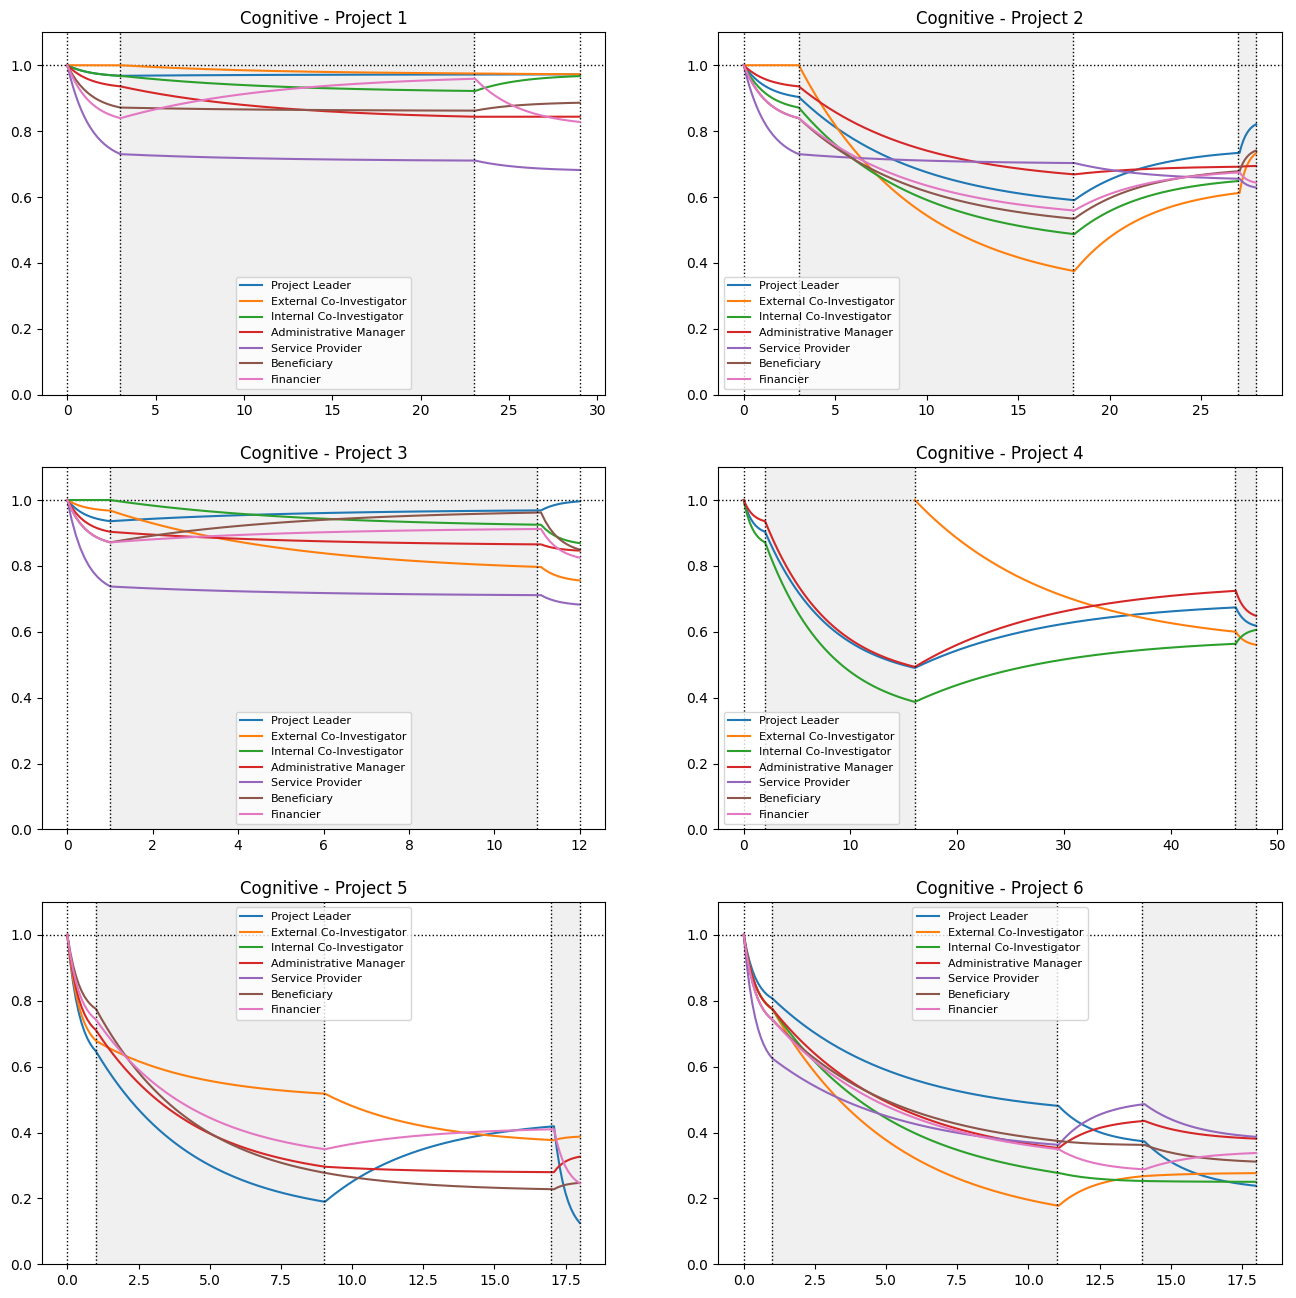

In [10]:
trust_value = 0.1
Expectations_list = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']


plt.figure(figsize=(16,16)) #, dpi=1200)
for Proj_nr1 in project_list_cog:
  Proj_nr = Proj_nr1
  # ## Swapping Projects 2 and 3:
  # if Proj_nr1 == 2:
  #   Proj_nr = 3
  # elif Proj_nr1 == 3:
  #   Proj_nr = 2
  # else:
  #   Proj_nr = Proj_nr1
  Proj_data = Cognitive_data[Cognitive_data['Project']==Proj_nr1].drop(columns=['Year', 'Project Title', 'Index', 'Role (ESP)'])
  Proj_data['Mean'] = Proj_data[Expectations_list].mean(axis=1)
  plt.subplot(3, 2, Proj_nr)
  plt.title(f'Cognitive - Project {Proj_nr}')
  plt.ylim(0, 1.1)
  plt.axhline(y=1, color='k', linestyle='dotted', linewidth=1)
  for role in role_list_cog:
    Role_data = Proj_data[Proj_data['Role'] == role]
    Role_data = Role_data.groupby(['Stage', 'Mid-point?', 'Project', 'Role', 'Month']).mean().sort_values(by='Month').reset_index()
    Role_data['Month_diff'] = Role_data['Month'].diff()
    Role_data.at[0,'Month_diff'] = Role_data.at[0,'Month']
    Role_data['Mean'] = Role_data['Mean'].ffill() ## If there are no answers in a given period, then we keep the expectations constant from the previous period
    # print(Role_data)

    colors = ['0.9', '1.']
    if role == role_list_cog[-1]:
      month_list = Role_data['Month'].tolist()
      for i in range(len(month_list)-1):
        xmin = month_list[i]
        xmax = month_list[i+1]
        color_index = i % 2
        plt.axvspan(xmin, xmax, color=colors[color_index], alpha=0.6, zorder=-1)
        plt.axvline(x=xmin, color='k', linestyle='dotted', linewidth=1)
      plt.axvline(x=0, color='k', linestyle='dotted', linewidth=1)
      plt.axvline(x=month_list[-1], color='k', linestyle='dotted', linewidth=1)


    solution_total = []
    final_stage_values = []
    T0 = 1
    for i in range(len(Role_data)):
      alpha = math.log(1./trust_value)/Role_data['Month_diff'].iloc[i]
      t_stage = np.linspace(0, Role_data['Month_diff'].iloc[i], int(10*Role_data['Month_diff'].iloc[i]+1))
      if not math.isnan(Role_data['Mean'].iloc[i]):
        e = (Role_data['Mean'].iloc[i] - 1)/4
        stage_solution = odeint(Trust_ODE, T0, t_stage, args = (e, alpha)).flatten().tolist()
        T0 = stage_solution[-1]
        final_stage_values.append(round(T0,5))
        solution_total = solution_total+ stage_solution[:-1]
      else:
        solution_total = solution_total + [np.nan]*int(10*Role_data['Month_diff'].iloc[i])
    t_total = np.linspace(0, max(Role_data['Month']), int(10*max(Role_data['Month'])))
    plt.plot(t_total, solution_total, label = role)
    print(f'Project Number: {Proj_nr}, Role: {role}, Final Stage Values: {final_stage_values}')
  print('-'*50)
  # if Proj_nr == 6:
  plt.legend(fontsize=8)

## Affective Expectations:

In [11]:
project_list_aff = Affective_data['Project'].unique()
print('Project list:', project_list_aff)
role_list_aff = Cognitive_data['Role'].unique()
print('Role list:', role_list_aff)
stage_list_aff = Cognitive_data['Stage'].unique()
print('Stage list:', stage_list_aff)

Project list: [1 2 3 4 5 6]
Role list: ['Project Leader' 'External Co-Investigator' 'Internal Co-Investigator'
 'Administrative Manager' 'Service Provider' 'Beneficiary' 'Financier']
Stage list: ['Planning' 'Execution' 'Closing']


Project Number: 1, Role: Project Leader, Final Stage Values: [0.9775, 0.97525, 0.97502]
Project Number: 1, Role: External Co-Investigator, Final Stage Values: [1.0, 0.9775, 0.95275]
Project Number: 1, Role: Internal Co-Investigator, Final Stage Values: [0.9325, 0.94825, 0.94982]
Project Number: 1, Role: Administrative Manager, Final Stage Values: [0.775, 0.7525, 0.72775]
Project Number: 1, Role: Service Provider, Final Stage Values: [0.7375, 0.6925, 0.74425]
Project Number: 1, Role: Beneficiary, Final Stage Values: [0.82, 0.782, 0.8432]
Project Number: 1, Role: Financier, Final Stage Values: [0.7525, 0.70525, 0.72302]
--------------------------------------------------
Project Number: 2, Role: Project Leader, Final Stage Values: [0.865, 0.604, 0.8254, 0.82504]
Project Number: 2, Role: External Co-Investigator, Final Stage Values: [0.955, 0.4555, 0.72055, 0.74705]
Project Number: 2, Role: Internal Co-Investigator, Final Stage Values: [0.8425, 0.51175, 0.61367]
Project Number: 2, Role: Ad

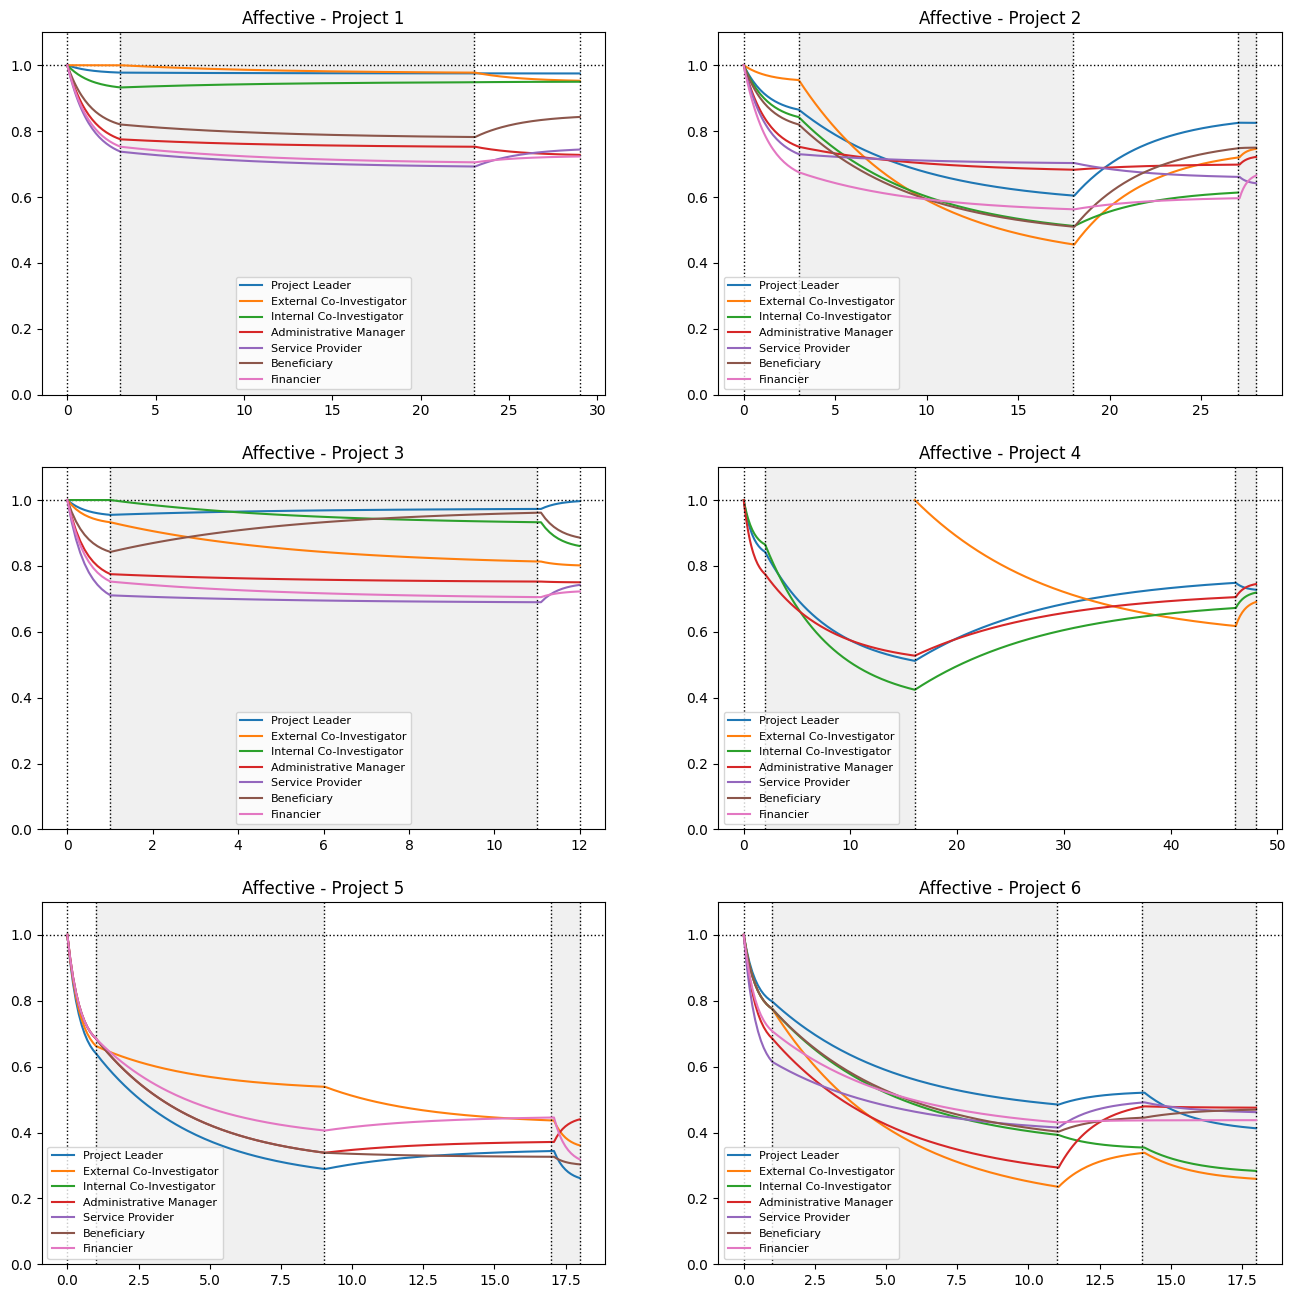

In [12]:
trust_value = 0.1
Expectations_list = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']

plt.figure(figsize=(16,16)) #, dpi=1200)
for Proj_nr1 in project_list_aff:
  Proj_nr = Proj_nr1
  # ## Swapping Projects 2 and 3:
  # if Proj_nr1 == 2:
  #   Proj_nr = 3
  # elif Proj_nr1 == 3:
  #   Proj_nr = 2
  # else:
  #   Proj_nr = Proj_nr1
  Proj_data = Affective_data[Affective_data['Project']==Proj_nr1].drop(columns=['Year', 'Project Title', 'Index', 'Role (ESP)'])
  Proj_data['Mean'] = Proj_data[Expectations_list].mean(axis=1)
  plt.subplot(3, 2, Proj_nr)
  plt.title(f'Affective - Project {Proj_nr}')
  plt.ylim(0, 1.1)
  plt.axhline(y=1, color='k', linestyle='dotted', linewidth=1)
  for role in role_list_aff:
    Role_data = Proj_data[Proj_data['Role'] == role]
    Role_data = Role_data.groupby(['Stage', 'Mid-point?', 'Project', 'Role', 'Month']).mean().sort_values(by='Month').reset_index()
    Role_data['Month_diff'] = Role_data['Month'].diff()
    Role_data.at[0,'Month_diff'] = Role_data.at[0,'Month']
    Role_data['Mean'] = Role_data['Mean'].ffill() ## If there are no answers in a given period, then we keep the expectations constant from the previous period
    # print(Role_data)

    colors = ['0.9', '1.']
    if role == role_list_cog[-1]:
      month_list = Role_data['Month'].tolist()
      for i in range(len(month_list)-1):
        xmin = month_list[i]
        xmax = month_list[i+1]
        color_index = i % 2
        plt.axvspan(xmin, xmax, color=colors[color_index], alpha=0.6, zorder=-1)
        plt.axvline(x=xmin, color='k', linestyle='dotted', linewidth=1)
      plt.axvline(x=0, color='k', linestyle='dotted', linewidth=1)
      plt.axvline(x=month_list[-1], color='k', linestyle='dotted', linewidth=1)

    solution_total = []
    final_stage_values = []
    T0 = 1
    for i in range(len(Role_data)):
      alpha = math.log(1./trust_value)/Role_data['Month_diff'].iloc[i]
      t_stage = np.linspace(0, Role_data['Month_diff'].iloc[i], int(10*Role_data['Month_diff'].iloc[i]+1))
      if not math.isnan(Role_data['Mean'].iloc[i]):
        e = (Role_data['Mean'].iloc[i] - 1)/4
        stage_solution = odeint(Trust_ODE, T0, t_stage, args = (e, alpha)).flatten().tolist()
        T0 = stage_solution[-1]
        final_stage_values.append(round(T0, 5))
        solution_total = solution_total+ stage_solution[:-1]
      else:
        solution_total = solution_total + [np.nan]*int(10*Role_data['Month_diff'].iloc[i])
    t_total = np.linspace(0, max(Role_data['Month']), int(10*max(Role_data['Month'])))
    plt.plot(t_total, solution_total, label = role)
    print(f'Project Number: {Proj_nr}, Role: {role}, Final Stage Values: {final_stage_values}')
  print('-'*50)
  plt.legend(fontsize=8)